In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lineitem/lineitem_details_24_sep.csv
/kaggle/input/sku-orders/Sku_forecast_8-nov.csv


In [2]:
product = pd.read_csv("../input/sku-orders/Sku_forecast_8-nov.csv")

### Data Setup & Reading

In [3]:
product.head()

,store,order_id,user_id,product_id,prod_order_qty,createdAt,order_dt,hours,category_name,catg_status,product_name,odoo_id,prod_price,prod_status,prod_amount
0,SOUTH MELBOURNE,1.636330e+12,0a4344db-061d-490a-9165-51207fb523f8,8b3f34cf-0ec3-415c-a5dc-02a7d24c8c3b,5,11/8/2021 11:26,11/8/2021,11,Eggs & Dairy,Active,JOSH'S RAINBOW FREE RANGE EGGS JUMBO 6 PACK 400G,SEND00797,5.00,Active,25.00
1,POTTS POINT,1.636330e+12,f647bbba-08ac-4926-a59f-c696e7a9b43a,878eae08-7c07-4f89-b1b1-7854639ab133,1,11/8/2021 12:00,11/8/2021,12,Bakery,Active,WHOLEMEAL BOWAN ISLAND BAKERY 400G,SEND01533,5.00,Active,5.00
2,POTTS POINT,1.636330e+12,f647bbba-08ac-4926-a59f-c696e7a9b43a,2c0e96f8-62ef-4c50-9735-938921ea3a7c,1,11/8/2021 12:00,11/8/2021,12,Meals,Active,YOUFOODZ BEEF LASAGNE,SEND00657,9.95,Active,9.95
3,POTTS POINT,1.636330e+12,f647bbba-08ac-4926-a59f-c696e7a9b43a,8fc49263-a33d-457e-a87c-63e7dcfa6d5d,1,11/8/2021 12:00,11/8/2021,12,Snacks,Active,SUNRICE RICE CAKES THIN ORIGINAL 150G,SEND00354,3.00,Active,3.00
4,POTTS POINT,1.636330e+12,f647bbba-08ac-4926-a59f-c696e7a9b43a,65d328a7-db9a-448d-a33e-bdfef5998ffb,1,11/8/2021 12:00,11/8/2021,12,Meals,Active,YOUFOODZ NONNA'S SPAGHETTI BOLOGNESE,SEND00663,9.95,Active,9.95


In [4]:
product.describe()

,order_id,prod_order_qty,hours,prod_price,prod_amount
count,5.305000e+03,5305.000000,5305.000000,5226.000000,5305.000000
mean,1.633992e+12,1.210179,15.684637,5.236433,5.809425
std,1.599227e+09,0.702378,3.388200,2.699784,3.830308
min,1.629550e+12,1.000000,8.000000,0.400000,0.000000
25%,1.632970e+12,1.000000,13.000000,3.500000,3.500000
50%,1.634100e+12,1.000000,16.000000,5.000000,5.000000
75%,1.635330e+12,1.000000,18.000000,6.000000,7.500000
max,1.636370e+12,12.000000,23.000000,15.000000,83.200000


In [5]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5305 entries, 0 to 5304
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   store           5305 non-null   object 
 1   order_id        5305 non-null   float64
 2   user_id         5305 non-null   object 
 3   product_id      5305 non-null   object 
 4   prod_order_qty  5305 non-null   int64  
 5   createdAt       5305 non-null   object 
 6   order_dt        5305 non-null   object 
 7   hours           5305 non-null   int64  
 8   category_name   5305 non-null   object 
 9   catg_status     5305 non-null   object 
 10  product_name    5305 non-null   object 
 11  odoo_id         5305 non-null   object 
 12  prod_price      5226 non-null   float64
 13  prod_status     5305 non-null   object 
 14  prod_amount     5305 non-null   float64
dtypes: float64(3), int64(2), object(10)
memory usage: 621.8+ KB


In [6]:
product['order_dt']= pd.to_datetime(product['order_dt'])

In [7]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5305 entries, 0 to 5304
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   store           5305 non-null   object        
 1   order_id        5305 non-null   float64       
 2   user_id         5305 non-null   object        
 3   product_id      5305 non-null   object        
 4   prod_order_qty  5305 non-null   int64         
 5   createdAt       5305 non-null   object        
 6   order_dt        5305 non-null   datetime64[ns]
 7   hours           5305 non-null   int64         
 8   category_name   5305 non-null   object        
 9   catg_status     5305 non-null   object        
 10  product_name    5305 non-null   object        
 11  odoo_id         5305 non-null   object        
 12  prod_price      5226 non-null   float64       
 13  prod_status     5305 non-null   object        
 14  prod_amount     5305 non-null   float64       
dtypes: d

In [8]:
product['week_day']= product['order_dt'].dt.day_name()

In [9]:
product['hour'] = product['order_dt'].dt.hour

### Exploratory Demand Analysis based on Weekdays and Hours

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(8,6)})

[Text(0, 0, '1024'),
 Text(0, 0, '890'),
 Text(0, 0, '788'),
 Text(0, 0, '677'),
 Text(0, 0, '672'),
 Text(0, 0, '648'),
 Text(0, 0, '606')]

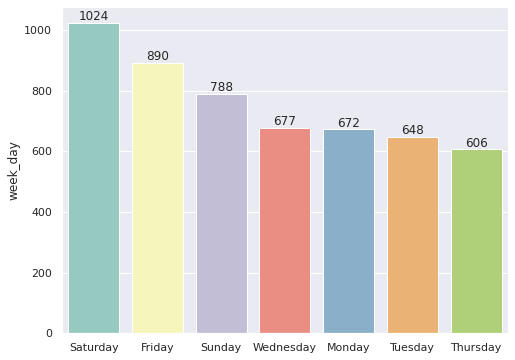

In [11]:
ax=sns.barplot(x=product['week_day'].value_counts().index,
       y=product['week_day'].value_counts(),palette="Set3")
ax.bar_label(ax.containers[0])

#### OBSERVATION: Friday records the highest sale by quantity (250) across all weekdays, whereas Sunday records the lowest orders.

[Text(0, 0, '5305')]

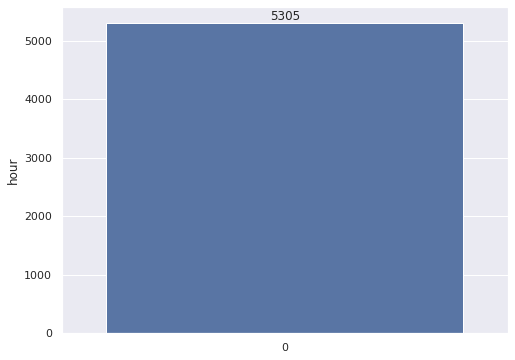

In [12]:
ax=sns.barplot(x=product['hour'].value_counts().index,
       y=product['hour'].value_counts())
ax.bar_label(ax.containers[0])

#### OBSERVATION: Maximum order rush identified at 5PM (17 hour) across all days. Whereas the busiest time interval is between 2PM to 6PM.

### Data Modeling for Demand Classification

In [13]:
product['Date'] = product['order_dt'].dt.date

In [14]:
product.columns

Index(['store', 'order_id', 'user_id', 'product_id', 'prod_order_qty',
       'createdAt', 'order_dt', 'hours', 'category_name', 'catg_status',
       'product_name', 'odoo_id', 'prod_price', 'prod_status', 'prod_amount',
       'week_day', 'hour', 'Date'],
      dtype='object')

In [15]:
product_grouped = product.groupby(['product_id','product_name','Date']).agg(total_qty=('prod_order_qty','sum')).reset_index()

In [16]:
# Calulating average and standard deviation

stats = product_grouped.groupby('product_id').agg(average=('total_qty','mean'),
                                                    sd=('total_qty','std')).reset_index()

#### Calculating Coefficient of Variation (CV²)

In [17]:
stats['cv_sqr'] = (stats['sd']/stats['average'])**2
stats.sample(5)

,product_id,average,sd,cv_sqr
628,cba2ce2f-403b-4c40-94c6-45f2d420c388,1.000000,0.000000,0.000000
96,2034f1d7-03ec-4b42-9a01-58e3bcc40dee,1.857143,1.573592,0.717949
274,586a3dbf-cf6f-4a8e-921c-b8e36c003ed9,1.428571,0.786796,0.303333
366,7917e537-9e9a-4616-be4e-5f73e1351a7a,1.333333,0.500000,0.140625
698,e3e430b6-6476-487c-b61e-dff0a173a62a,1.000000,NaN,NaN


#### Modeling for Average Demand Interval(ADI)

In [18]:
prod_by_date= product.groupby(['product_id','Date']).agg(count=('product_id','count')).reset_index()

In [19]:
prod_skus= prod_by_date.product_id.value_counts()

In [20]:
new_df= pd.DataFrame()

In [21]:
for i in range(len(prod_skus.index)):
    a= prod_by_date[prod_by_date['product_id']==prod_skus.index[i]]
    a['previous_date']=a['Date'].shift(1)
    new_df=pd.concat([new_df,a],axis=0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4104 entries, 3295 to 0
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     4104 non-null   object
 1   Date           4104 non-null   object
 2   count          4104 non-null   int64 
 3   previous_date  3311 non-null   object
dtypes: int64(1), object(3)
memory usage: 160.3+ KB


In [23]:
new_df['duration']=new_df['Date']- new_df['previous_date']
new_df.sample(5)

,product_id,Date,count,previous_date,duration
2901,b6a0c551-eb41-480f-b1ec-2e3768c64aaf,2021-09-07,1,NaN,NaT
1193,43e04db5-cc28-45d1-970f-505d3116b303,2021-10-08,2,2021-10-07,1 days
1537,61411171-ad87-4ed8-9bfd-e1ea6dccf896,2021-09-14,1,NaN,NaT
109,0630160d-4e0e-41a7-b21f-e878e4f6c14c,2021-11-01,1,2021-10-27,5 days
78,05072bd4-0f58-4bc4-a993-d2e50b3fcd8f,2021-10-20,1,2021-10-15,5 days


In [24]:
new_df['Duration']=new_df['duration'].astype(str).str.replace('days','')

In [25]:
new_df['Duration']=pd.to_numeric(new_df['Duration'],errors='coerce')

#### Calculating ADI

In [26]:
ADI = new_df.groupby('product_id').agg(ADI = ('Duration','mean')).reset_index()
ADI.sample(5)

,product_id,ADI
511,a6eab7cd-1f68-4fd1-adc6-5413da0cbef9,9.50
127,2a742384-fe35-4756-8eda-3242aadc5618,11.00
455,9467735b-c47d-4655-b29f-634365bf408f,9.25
108,24c3de5a-c079-4da0-ad94-2acfd294d1a1,1.00
140,2e89668b-61e9-47dd-aeb3-e10993bebb1b,3.20


In [27]:
## Joining CV_sqr and ADI results

adi_cv=pd.merge(ADI,stats, on='product_id')

In [28]:
adi_cv.sample(5)

,product_id,ADI,average,sd,cv_sqr
649,d2a44930-6ef5-4bbb-b802-1f832a2ac0d7,4.600000,1.5000,0.836660,0.311111
641,cff0cc3b-78ca-4eda-b87c-1d19b42763b9,NaN,12.0000,NaN,NaN
515,a856fbc4-0319-4d99-9d91-136138f41a44,6.000000,1.0000,0.000000,0.000000
1,001c1708-971c-4be9-957d-01f62cde625f,10.333333,1.0000,0.000000,0.000000
706,e7f55304-c7f7-4a0f-a02b-cc1c9c6dc55a,3.266667,1.8125,2.007278,1.226476


#### Classifying Product demand based on Forecastability

In [29]:
## Defining a fuction for classification

def category(df):
    a=0
    
    if((df['ADI']<1.32) & (df['cv_sqr']<0.49)):
        a='Smooth'
    if((df['ADI']>=1.32) & (df['cv_sqr']>=0.49)):  
        a='Lumpy'
    if((df['ADI']<1.32) & (df['cv_sqr']>=0.49)):
        a='Erratic'
    if((df['ADI']>=1.32) & (df['cv_sqr']<0.49)):
        a='Intermittent'
    return a

In [30]:
## classifying products based on their forcastability

adi_cv['category']=adi_cv.apply(category,axis=1)

In [31]:
adi_cv.sample(5)

,product_id,ADI,average,sd,cv_sqr,category
707,e7f63831-5945-4eec-821c-449f127a7d26,27.5,1.0,0.0,0.0,Intermittent
10,04101f3b-c399-42fb-987d-5c4eb8933879,9.0,1.0,0.0,0.0,Intermittent
781,fde2bd59-8a19-4c04-a960-9ae87ada6ec5,10.0,1.0,0.0,0.0,Intermittent
546,b1657019-3fe3-411d-ac57-8c45b76cb3f9,NaN,1.0,NaN,NaN,0
314,67ec0659-42a7-41ab-a521-ba09ab74aebd,8.0,1.0,0.0,0.0,Intermittent


#### Results transferred to CSV file

In [32]:
adi_cv.to_csv('adi_cv.csv',index=False)

In [33]:
adi_cv['category'].value_counts()

Intermittent    480
0               223
Lumpy            70
Smooth           18
Erratic           2
Name: category, dtype: int64

#### Visualizing the demand

<AxesSubplot:xlabel='cv_sqr', ylabel='ADI'>

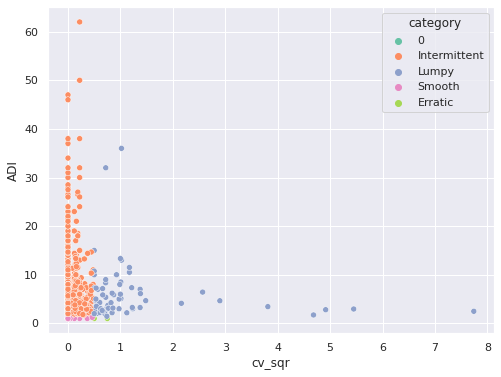

In [34]:
sns.scatterplot(x='cv_sqr',y='ADI',hue='category',data=adi_cv, palette="Set2")

#### OBSERVATION : Most product (113) depicts no pattern as these products have been only ordered once i.e single day order. Next is our Intermittent demand (52) showing little variation in qunatity but high variation in the interval between two demands.